### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset

In [ ]:
df = pd.read_csv('scores_data.csv')

In [ ]:
# check first 5 records
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [ ]:
# check last 5 records
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [ ]:
# details of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [ ]:
# check 
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [ ]:
# check for any missing value
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [ ]:
# check is there any duplicate value available
df.duplicated().sum()

np.int64(0)

In [ ]:
# Fixing column name Score
df.columns = df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [15]:
# Extracting the real score and converting into intiger datatype

df['Score_int'] = df['Score'].str.split("/").str[0].astype(int)

df.head()

,Batch,User_ID,Score,Score_int
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


<Axes: xlabel='Score_int', ylabel='Count'>

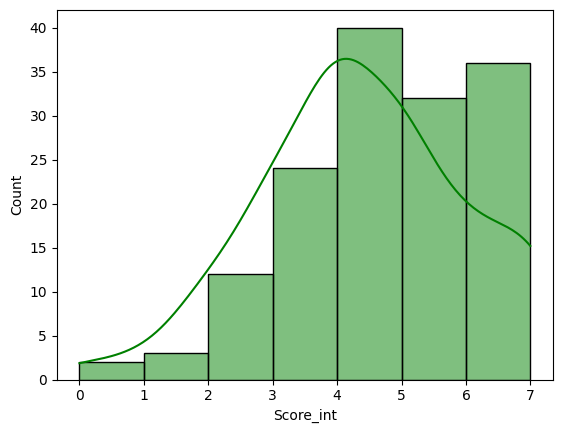

In [21]:
# distribution of Score_int column

sns.histplot(df['Score_int'], kde=True, bins=7 , color='green')


In [22]:
# Value Count per Batch

print("*"*7,"Count","*"*7)
print(df['Batch'].value_counts())

print("\n","*"*4,"Percentage","*"*4)
print(df['Batch'].value_counts(normalize=True) * 100)

******* Count *******
Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

 **** Percentage ****
Batch
AI_ELITE_7    35.570470
AI_ELITE_6    32.214765
AI_ELITE_4    32.214765
Name: proportion, dtype: float64


In [23]:
# Average Score of each batch

df.groupby(df['Batch'])['Score_int'].mean()

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score_int, dtype: float64

<Axes: xlabel='Batch', ylabel='Score_int'>

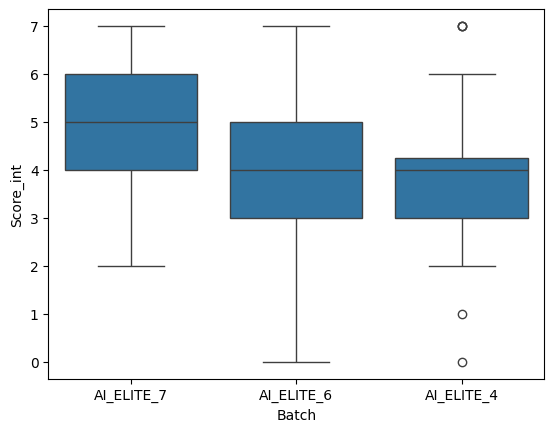

In [24]:
# visuals on Batch VS Score_int

sns.boxplot(x='Batch', y='Score_int', data=df)

In [25]:
# counting total student based on score and batch

pd.crosstab(
  df['Batch'],
  df['Score_int'],
)

Score_int,0,1,2,3,4,5,6,7
Batch,,,,,,,,
AI_ELITE_4,1,1,7,8,19,8,1,3
AI_ELITE_6,1,2,3,9,11,13,4,5
AI_ELITE_7,0,0,2,7,10,11,13,10


<Axes: xlabel='Score_int', ylabel='Batch'>

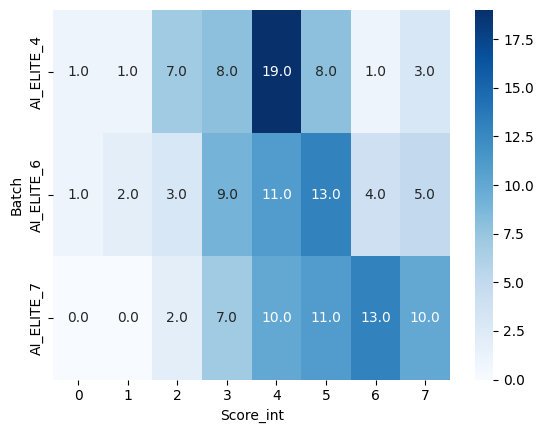

In [26]:
sns.heatmap(
  pd.crosstab(
    df['Batch'],
    df['Score_int'],
  ),
  annot=True,
  fmt='.1f',
  cmap='Blues'
)

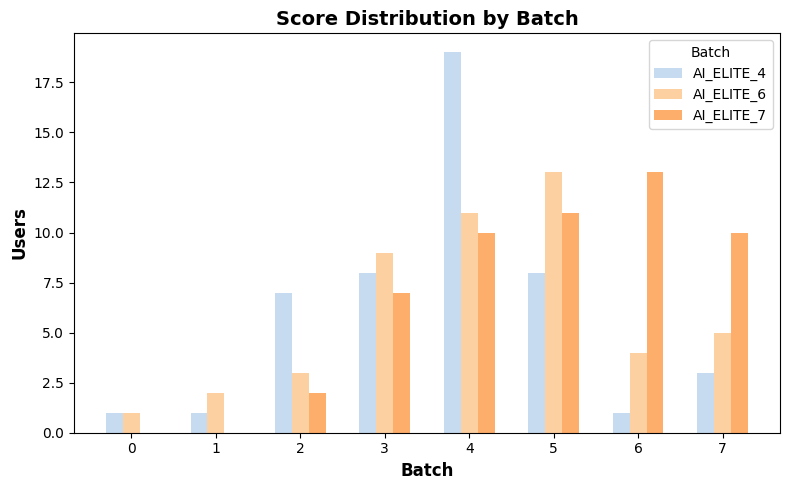

In [27]:
res = df.groupby(['Score_int', 'Batch']).size().reset_index(name='count')
pivot = res.pivot(index='Score_int', columns='Batch', values='count').fillna(0)


# Grouped bar
plt.figure(figsize=(8, 5))

x = np.arange(len(pivot.index))
width = 0.2  # bar width

colors = ['#C6DBEF', '#FDD0A2', '#FDAE6B']

# Plot each grade as a bar group
for i, grade in enumerate(pivot.columns):
    plt.bar(x + i * width, pivot[grade], width, label=grade, color=colors[i])


plt.xlabel("Batch", fontsize=12, fontweight='bold')
plt.ylabel("Users", fontsize=12, fontweight='bold')
plt.title("Score Distribution by Batch", fontsize=14, fontweight='bold')
plt.xticks(x + width * (len(pivot.columns) / 2 - 0.5), pivot.index)
plt.legend(title="Batch")
plt.tight_layout()
plt.show()

In [28]:
# __Insights__

# as per the average score , batch AI_ELITE_7 is performing better than other two batches

# batch AI_ELITE_4 has the least average score , and it has some outliers that responsible for least average

# Low scores (0–1) are rare across all batches

# Most of the students who got 7/7 is from batch AI_ELITE_7

# AI_ELITE_7 shows the strongest overall performance

# AI_ELITE_4 has the weakest performance trend